In [5]:
import csv
import tensorflow.compat.v1 as tf
tf.disable_v2_behavior()
import matplotlib.pyplot as plt
from random import shuffle
import numpy as np
from numpy import arange, round, rint
from sklearn.metrics import confusion_matrix
from tools import plot_confusion_matrix

def read_data(filename="datasets/breast-cancer-wisconsin.data"):
    x = []
    y = []
    
    with open(filename) as csv_file:
        csv_reader = csv.reader(csv_file)
        for row in csv_reader:
            row.pop(0) #removing the id from each entry
            for i in range(len(row)):
                if row[i] == '?':
                    row[i] = 0
            x.append(list(map(float, row[:-1])))
            y.append([int(row[-1])])

    return x, y
x,y = read_data()


for i in range(len(y)):
    if y[i] == [2]:
        y[i] = [0]
    else:
        y[i] = [1]
        


Instructions for updating:
non-resource variables are not supported in the long term


In [6]:
def shuffle_data(x, y):
    combined = list(zip(x, y))
    shuffle(combined)
    return zip(*combined)

def split_data(x, y, train_ratio=0.8):
    pivot = int(train_ratio * len(x))
    return x[:pivot], x[pivot:], y[:pivot], y[pivot:]

x, y = shuffle_data(x, y)

x_train, x_test, y_train, y_test = split_data(x, y)   

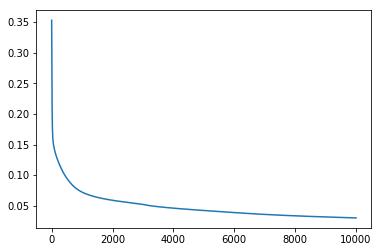

In [7]:


x_ = tf.placeholder(tf.float32, [None, 9])
y_ = tf.placeholder(tf.float32, [None, 1])


layer_0_weights = tf.Variable(tf.random_normal([9,15]))
layer_0_bias = tf.Variable(tf.random_normal([15]))
layer_0 = tf.nn.sigmoid(tf.add((tf.matmul(x_, layer_0_weights)), layer_0_bias))

layer_1_weights = tf.Variable(tf.random_normal([15,15]))
layer_1_bias = tf.Variable(tf.random_normal([15]))
layer_1 = tf.nn.sigmoid(tf.add(tf.matmul(layer_0, layer_1_weights), layer_1_bias))

layer_2_weights = tf.Variable(tf.random_normal([15,1]))
layer_2_bias = tf.Variable(tf.random_normal([1]))
layer_2 = tf.nn.sigmoid(tf.add(tf.matmul(layer_1, layer_2_weights), layer_2_bias))

cost = tf.reduce_mean(tf.losses.mean_squared_error(labels=y_, predictions=layer_2))
optimizer = tf.train.GradientDescentOptimizer(learning_rate=.05).minimize(cost)

N_EPOCHS = 10000

sess = tf.InteractiveSession()
tf.global_variables_initializer().run()



errors = []

for i in range(N_EPOCHS):
    _, error = sess.run([optimizer,cost], feed_dict={x_: x_train, y_: y_train})
    errors.append(error)

    
plt.plot(errors)
plt.show()    

Model accuracy: 0.96601075


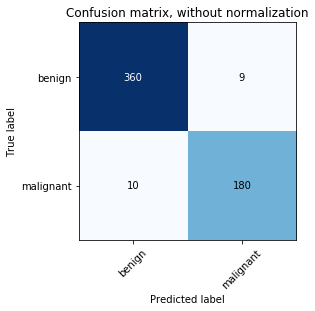

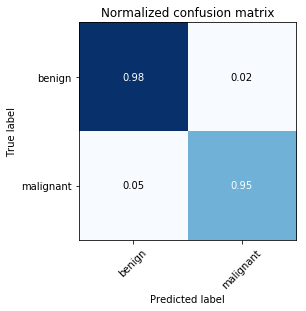

sensitivity =  0.9473684210526315
specificity =  0.975609756097561
precision =  0.9523809523809523
recall =  0.9473684210526315


In [8]:
# training data
#accuracy 
correct_prediction = tf.equal(tf.round(layer_2), y_)
accuracy = tf.reduce_mean(tf.cast(correct_prediction, tf.float32))
print('Model accuracy:',accuracy.eval(feed_dict={x_: x_train, y_: y_train}))

#confusion matrix 
predictions = round(sess.run(layer_2, feed_dict={x_: x_train}))

class_names = ['benign', 'malignant']
cfm = confusion_matrix(y_train, predictions)
plt.figure()
plot_confusion_matrix(cfm, classes=class_names, normalize=False, title='Confusion matrix, without normalization')

plt.figure()
plot_confusion_matrix(cfm, classes=class_names, normalize=True, title='Normalized confusion matrix')

plt.show()

t_p = 0
t_n = 0
f_p = 0
f_n = 0 
for i in range(len(y_train)):
    if predictions[i] == y_train[i]:
        if predictions[i] == 1:
            t_p += 1
        else:
            t_n += 1
    else:
        if predictions[i] == 1:
            f_p += 1
        else:
            f_n += 1

print('sensitivity = ' , t_p/(t_p + f_n))
print('specificity = ' , t_n/(t_n + f_p)) 
print('precision = ' , t_p/(t_p + f_p))
print('recall = ' , t_p/(t_p + f_n))

Model accuracy: 0.9071429


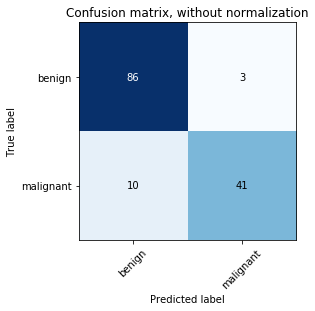

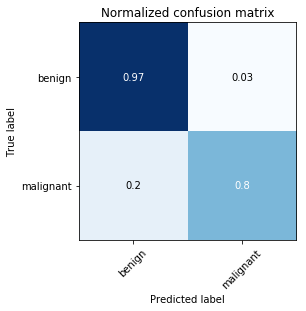

sensitivity =  0.803921568627451
specificity =  0.9662921348314607
precision =  0.9318181818181818
recall =  0.803921568627451


In [9]:
#test data 

#accuracy
correct_prediction = tf.equal(tf.round(layer_2), y_)
accuracy = tf.reduce_mean(tf.cast(correct_prediction, tf.float32))
print('Model accuracy:',accuracy.eval(feed_dict={x_: x_test, y_: y_test}))

#confusion matrix
predictions = round(sess.run(layer_2, feed_dict={x_: x_test}))
class_names = ['benign', 'malignant']
cfm = confusion_matrix(y_test, predictions)
plt.figure()
plot_confusion_matrix(cfm, classes=class_names, normalize=False, title='Confusion matrix, without normalization')

plt.figure()
plot_confusion_matrix(cfm, classes=class_names, normalize=True, title='Normalized confusion matrix')

plt.show()

t_p = 0
t_n = 0
f_p = 0
f_n = 0 
for i in range(len(y_test)):
    if predictions[i] == y_test[i]:
        if predictions[i] == 1:
            t_p += 1
        else:
            t_n += 1
    else:
        if predictions[i] == 1:
            f_p += 1
        else:
            f_n += 1

print('sensitivity = ' , t_p/(t_p + f_n))
print('specificity = ' , t_n/(t_n + f_p)) 
print('precision = ' , t_p/(t_p + f_p))
print('recall = ' , t_p/(t_p + f_n))